## Q1 a)

Nodes
['A', 'B', 'C', 'D']
Edges
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D'), ('B', 'A'), ('C', 'A'), ('D', 'C'), ('D', 'B')]


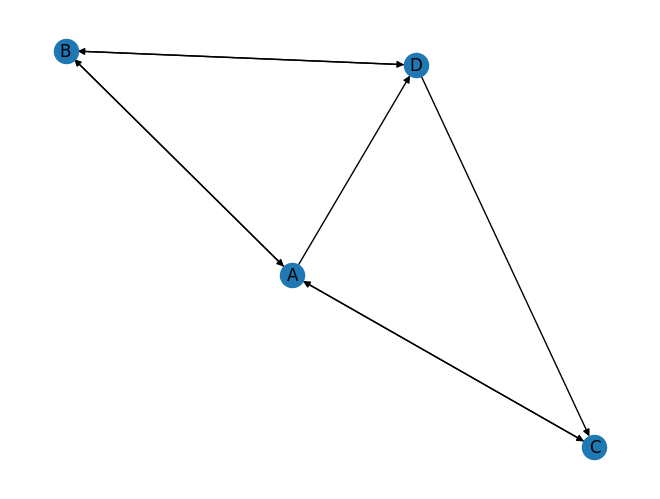

In [1]:
import networkx as nx
import numpy as np
# To create an empty directed graph
G = nx.DiGraph()
# To add a node
G.add_nodes_from('ABCD')
# To add an edge
G.add_edges_from([('A','B'),('A','C'),('A','D'),('B','D'),('B','A'),('C','A'),('D','C'),('D','B')])
node_list = G.nodes()
print("Nodes")
print(node_list)
# To get all the edges of a graph
edge_list = G.edges()
print("Edges")
print(edge_list)
nx.draw(G, with_labels = True)

In [2]:
A = nx.adjacency_matrix(G)
A = np.array(A.todense())
A = A.transpose()
A

array([[0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 0]])

In [18]:
Tr = A / A.sum(axis=0, keepdims=True)
Tr

array([[0.        , 0.5       , 1.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

## b)

In [19]:
# D=dict.fromkeys(G,1/4)
# nlist = list(D.values())
# x = np.array(nlist)
# for i in range(20):
#   y = np.matmul(Tr,x)
#   print(y)
#   s=np.subtract(x,y)
#   print(s)
#   if np.all((s)<0.001):
#     print(i,' iterations')
#     break
#   else:
#     x=y

# D

In [20]:
# Alternate method
r = np.matrix([1.0,1.0,1.0,1.0]).T*(1/4)
for i in range(100):
  r2 = Tr*r
  print(r2)
  y = np.subtract(r2,r)
  if np.all(np.abs(y)<0.001):
    print(i,' iterations')
    break
  else:
    r = r2

[[0.375     ]
 [0.20833333]
 [0.20833333]
 [0.20833333]]
[[0.3125    ]
 [0.22916667]
 [0.22916667]
 [0.22916667]]
[[0.34375]
 [0.21875]
 [0.21875]
 [0.21875]]
[[0.328125  ]
 [0.22395833]
 [0.22395833]
 [0.22395833]]
[[0.3359375 ]
 [0.22135417]
 [0.22135417]
 [0.22135417]]
[[0.33203125]
 [0.22265625]
 [0.22265625]
 [0.22265625]]
[[0.33398438]
 [0.22200521]
 [0.22200521]
 [0.22200521]]
[[0.33300781]
 [0.22233073]
 [0.22233073]
 [0.22233073]]
7  iterations


## Q2

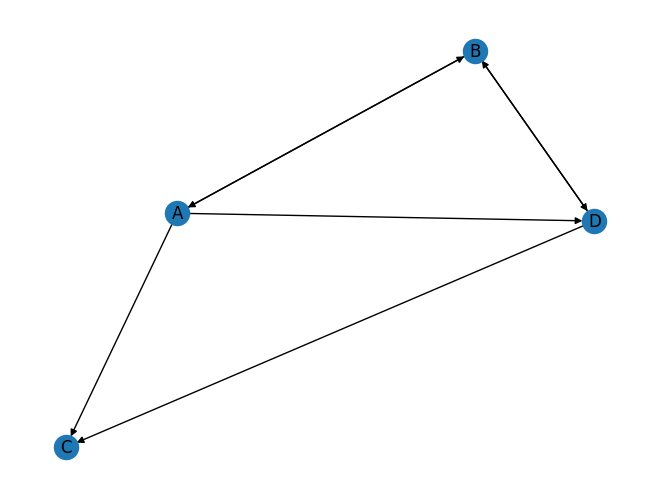

In [21]:
G1 =  G.copy()
G1.remove_edge('C','A')
nx.draw(G1, with_labels = True)

In [22]:
A1 = nx.adjacency_matrix(G1)
A1 = np.array(A1.todense())
A1 = A1.transpose()
A1

array([[0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 0]])

In [23]:
Tr1 = A1 / A1.sum(axis=0, keepdims=True)
Tr1

<ipython-input-23-45256358a562>:1: RuntimeWarning: invalid value encountered in divide
  Tr1 = A1 / A1.sum(axis=0, keepdims=True)


array([[0.        , 0.5       ,        nan, 0.        ],
       [0.33333333, 0.        ,        nan, 0.5       ],
       [0.33333333, 0.        ,        nan, 0.5       ],
       [0.33333333, 0.5       ,        nan, 0.        ]])

In [24]:
y1 = A1.sum(axis=0, keepdims=True)
for i,item in enumerate(y1[0]):
  if item==0:
    y1[0][i]=1
Tr1 = A1/y1
Tr1

array([[0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [25]:
r1 = np.matrix([1.0,1.0,1.0,1.0]).T*(1/4)
for i in range(30):
  r2 = Tr1*r1
  print(r2)
  y = np.subtract(r2,r1)
  if np.all(np.abs(y1)<0.001):
    print(i,' iterations')
    break
  else:
    r1 = r2

[[0.125     ]
 [0.20833333]
 [0.20833333]
 [0.20833333]]
[[0.10416667]
 [0.14583333]
 [0.14583333]
 [0.14583333]]
[[0.07291667]
 [0.10763889]
 [0.10763889]
 [0.10763889]]
[[0.05381944]
 [0.078125  ]
 [0.078125  ]
 [0.078125  ]]
[[0.0390625 ]
 [0.05700231]
 [0.05700231]
 [0.05700231]]
[[0.02850116]
 [0.04152199]
 [0.04152199]
 [0.04152199]]
[[0.020761  ]
 [0.03026138]
 [0.03026138]
 [0.03026138]]
[[0.01513069]
 [0.02205102]
 [0.02205102]
 [0.02205102]]
[[0.01102551]
 [0.01606907]
 [0.01606907]
 [0.01606907]]
[[0.00803454]
 [0.01170971]
 [0.01170971]
 [0.01170971]]
[[0.00585485]
 [0.00853303]
 [0.00853303]
 [0.00853303]]
[[0.00426652]
 [0.00621813]
 [0.00621813]
 [0.00621813]]
[[0.00310907]
 [0.00453124]
 [0.00453124]
 [0.00453124]]
[[0.00226562]
 [0.00330198]
 [0.00330198]
 [0.00330198]]
[[0.00165099]
 [0.00240619]
 [0.00240619]
 [0.00240619]]
[[0.0012031 ]
 [0.00175343]
 [0.00175343]
 [0.00175343]]
[[0.00087671]
 [0.00127775]
 [0.00127775]
 [0.00127775]]
[[0.00063887]
 [0.00093111]
 [0

We observe that the steady state probabilities tend to 0 values since the page C is a dead end with no output paths from C. So, the
Random Walk probability to move to the next page is almost 0

## Q3

In [26]:
G2 = G1.copy()
G2.add_edge('C','C')

In [27]:
A2 = nx.adjacency_matrix(G2)
A2 = np.array(A2.todense())
A2 = A2.transpose()
A2


array([[0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 0]])

In [28]:
Tr2 = A2 / A2.sum(axis=0, keepdims=True)
Tr2

array([[0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 1.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [29]:
r3 = np.matrix([1.0,1.0,1.0,1.0]).T*(1/4)
for i in range(100):
  r4 = Tr2*r3
  print(r4)
  y2 = np.subtract(r4,r3)
  if np.all(np.abs(y2)<0.001):
    print(i,' iterations')
    break
  else:
    r3 = r4

[[0.125     ]
 [0.20833333]
 [0.45833333]
 [0.20833333]]
[[0.10416667]
 [0.14583333]
 [0.60416667]
 [0.14583333]]
[[0.07291667]
 [0.10763889]
 [0.71180556]
 [0.10763889]]
[[0.05381944]
 [0.078125  ]
 [0.78993056]
 [0.078125  ]]
[[0.0390625 ]
 [0.05700231]
 [0.84693287]
 [0.05700231]]
[[0.02850116]
 [0.04152199]
 [0.88845486]
 [0.04152199]]
[[0.020761  ]
 [0.03026138]
 [0.91871624]
 [0.03026138]]
[[0.01513069]
 [0.02205102]
 [0.94076726]
 [0.02205102]]
[[0.01102551]
 [0.01606907]
 [0.95683634]
 [0.01606907]]
[[0.00803454]
 [0.01170971]
 [0.96854605]
 [0.01170971]]
[[0.00585485]
 [0.00853303]
 [0.97707908]
 [0.00853303]]
[[0.00426652]
 [0.00621813]
 [0.98329721]
 [0.00621813]]
[[0.00310907]
 [0.00453124]
 [0.98782845]
 [0.00453124]]
[[0.00226562]
 [0.00330198]
 [0.99113043]
 [0.00330198]]
[[0.00165099]
 [0.00240619]
 [0.99353662]
 [0.00240619]]
[[0.0012031 ]
 [0.00175343]
 [0.99529005]
 [0.00175343]]
[[8.76713192e-04]
 [1.27774557e-03]
 [9.96567796e-01]
 [1.27774557e-03]]
[[6.38872786e-0

We observe that the steady state probabilities tend to 0 values for pages A,B and D while it is almost 1 for page C. Since the page C is a
spider trap with the output paths coming back to same page (self loops). So, the Random Walk is stuck at C and its probability to move to
the other pages is almost 0

## Q4

In [30]:
alpha = 0.1
r5 = (1/4)*np.ones((4,1))
e1 = r5
for i in range(200):
  r6 = np.matmul((1-alpha)*Tr2,r5)+ alpha*e1
  print(r6)
  y = np.subtract(r6,r5)
  if np.all(np.abs(y)<0.001):
    print(i,' iterations')
    break
  else:
    r5 = r6

[[0.1375]
 [0.2125]
 [0.4375]
 [0.2125]]
[[0.120625]
 [0.161875]
 [0.555625]
 [0.161875]]
[[0.09784375]
 [0.13403125]
 [0.63409375]
 [0.13403125]]
[[0.08531406]
 [0.11466719]
 [0.68535156]
 [0.11466719]]
[[0.07660023]
 [0.10219445]
 [0.71901086]
 [0.10219445]]
[[0.0709875 ]
 [0.09396757]
 [0.74107735]
 [0.09396757]]
[[0.06728541]
 [0.08858166]
 [0.75555127]
 [0.08858166]]
[[0.06486175]
 [0.08504737]
 [0.76504351]
 [0.08504737]]
[[0.06327132]
 [0.08272984]
 [0.771269  ]
 [0.08272984]]
[[0.06222843]
 [0.08120982]
 [0.77535193]
 [0.08120982]]
[[0.06154442]
 [0.08021295]
 [0.77802968]
 [0.08021295]]
[[0.06109583]
 [0.07955915]
 [0.77978587]
 [0.07955915]]
[[0.06080162]
 [0.07913037]
 [0.78093765]
 [0.07913037]]
[[0.06060867]
 [0.07884915]
 [0.78169303]
 [0.07884915]]
13  iterations


Teleportation induces the probability of going to the other pages which was the concern in above ques 2 and 3.So, we observe that using
teleportation we have reduced the probability of page C from 0.99 to 0.78 and increased the prob of other pages as well